<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 160.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 183.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 164.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 159.9 MB/s eta 0:00:00


##### Import Necessary Modules:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [3]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [15]:
## Write your code here
# # Task 1: Display basic information and summary statistics
# print("Dataset Info:\n")
# df.info()

# # Summary statistics for numeric columns (if any exist)
# numeric_cols = df.select_dtypes(include='number')
# print("\nNumeric Summary Statistics:\n")
# print(numeric_cols.describe())

# # Summary statistics for categorical columns
# print("\nSummary Statistics (Categorical):\n")
# df.describe(include='object')

# # ---OR---
# Task 1: Display basic information and summary statistics
# Basic structural information
print("Dataset Info:\n")
df.info()

# Summary statistics for numeric columns
print("\nSummary Statistics:\n")
print(df.describe())

# Summary statistics for categorical columns
print("\nSummary Statistics (Categorical):\n")
df.describe(include='object')

Dataset Info:

<class 'pandas.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), str(100)
memory usage: 56.9 MB

Summary Statistics:

         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29393.000000    29411.000000    29450.000000     29448.00000   
mean         7.522140       10.060

/tmp/ipykernel_300/4289230962.py:27: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  df.describe(include='object')


,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,...,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,SurveyLength,SurveyEase
count,65437,65437,65437,54806,65437,54466,60784,60488,49237,40897,...,27710,28911,28844,28251,27764,28491,28807,28858,56182,56238
unique,5,8,110,3,1,118,8,418,10853,113,...,5,5,5,954,514,3,9,15,3,3
top,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,...,1-2 times a week,30-60 minutes a day,15-30 minutes a day,None of these,None of these,Hybrid (on-prem and cloud),Traditional public search engine,Software Development,Appropriate in length,Easy
freq,50207,23911,39041,23015,65437,9993,24942,3674,603,6947,...,14426,10951,9341,2364,2834,13230,15813,11918,38767,30071


### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [16]:
## Write your code here
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



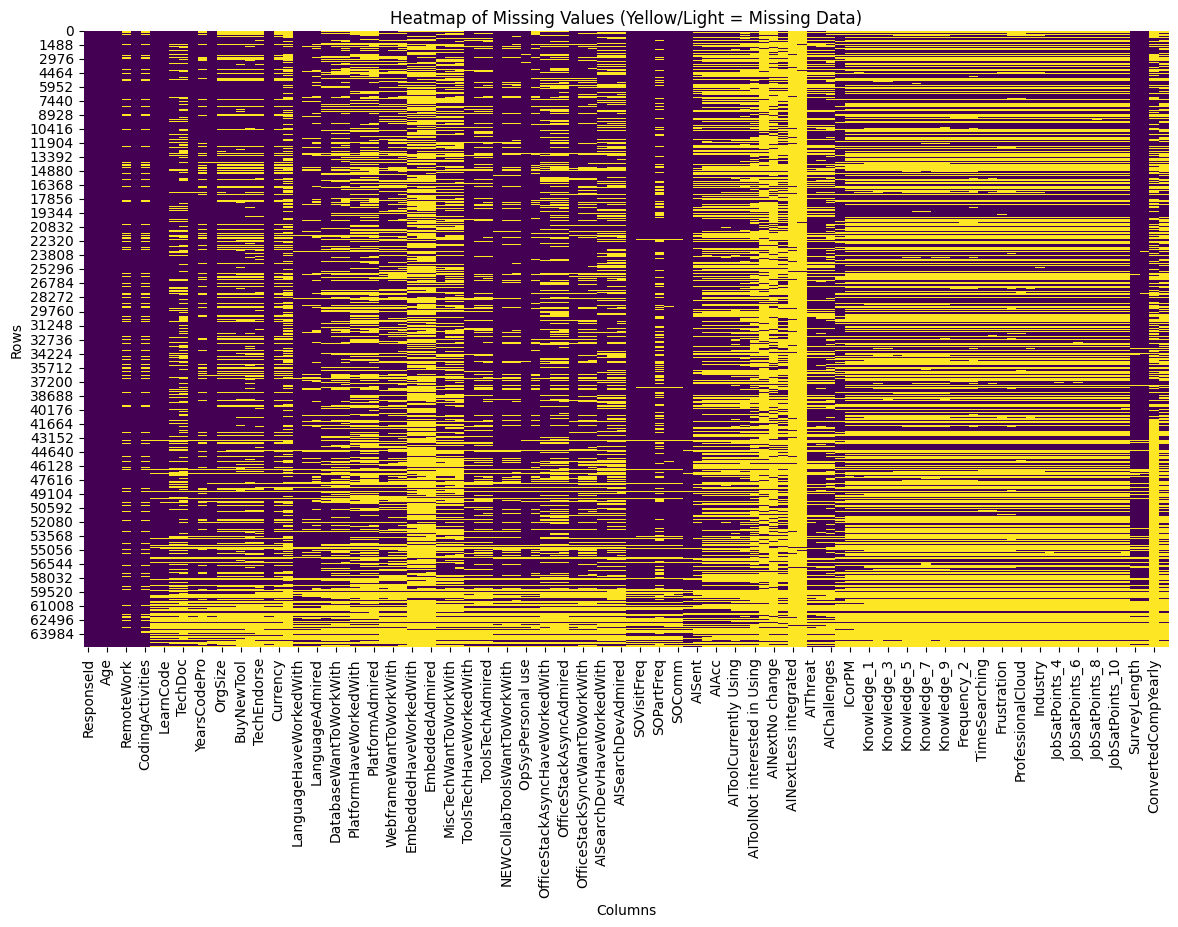

In [20]:
## Write your code here
plt.figure(figsize=(14, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values (Yellow/Light = Missing Data)')
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()


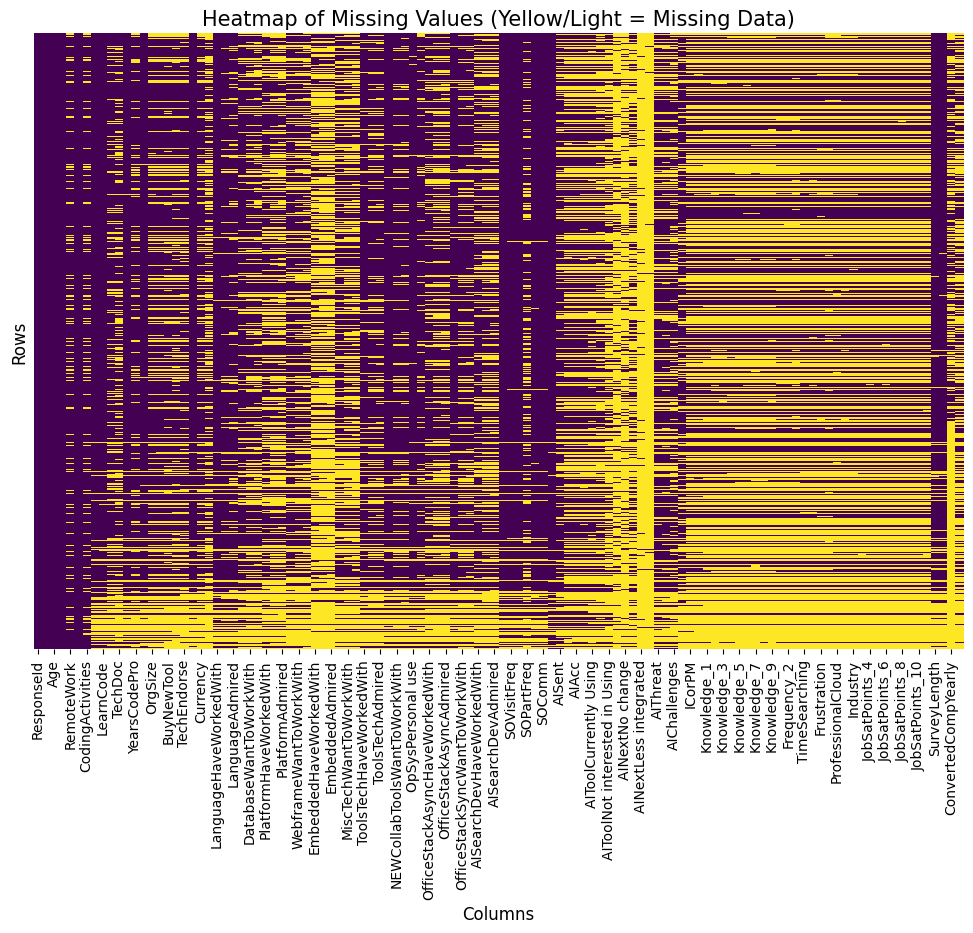

In [18]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create the heatmap
# df.isnull() returns True for missing values, which heatmap will highlight
# yticklabels=False hides individual row numbers to keep the plot clean
# cbar=False removes the color intensity bar as we only have two states (Null vs Not Null)
# cmap='viridis' provides a clear contrast
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

plt.title('Heatmap of Missing Values (Yellow/Light = Missing Data)', fontsize=15)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Rows', fontsize=12)

# Save and show
plt.savefig('missing_values_heatmap.png', bbox_inches='tight')
plt.show()

##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [21]:
## Write your code here
missing_employment = df['Employment'].isnull().sum()
print("Number of missing rows in 'Employment':", missing_employment)


Number of missing rows in 'Employment': 0


### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [23]:
## Write your code here
# Optional: show the distribution of non-missing values
print("\nValue counts for 'Employment':\n") 
print(df['Employment'].value_counts())
most_frequent_value = df['Employment'].mode()[0]
print("\nMost frequent value selected for imputation:", most_frequent_value)


Value counts for 'Employment':

Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but lo

##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [24]:
## Write your code here
# Impute missing values with the most frequent value (no inplace)
df['Employment'] = df['Employment'].fillna(most_frequent_value)

# Verify that missing values have been handled
print("\nMissing values in 'Employment' after imputation:", df['Employment'].isnull().sum())


Missing values in 'Employment' after imputation: 0


### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


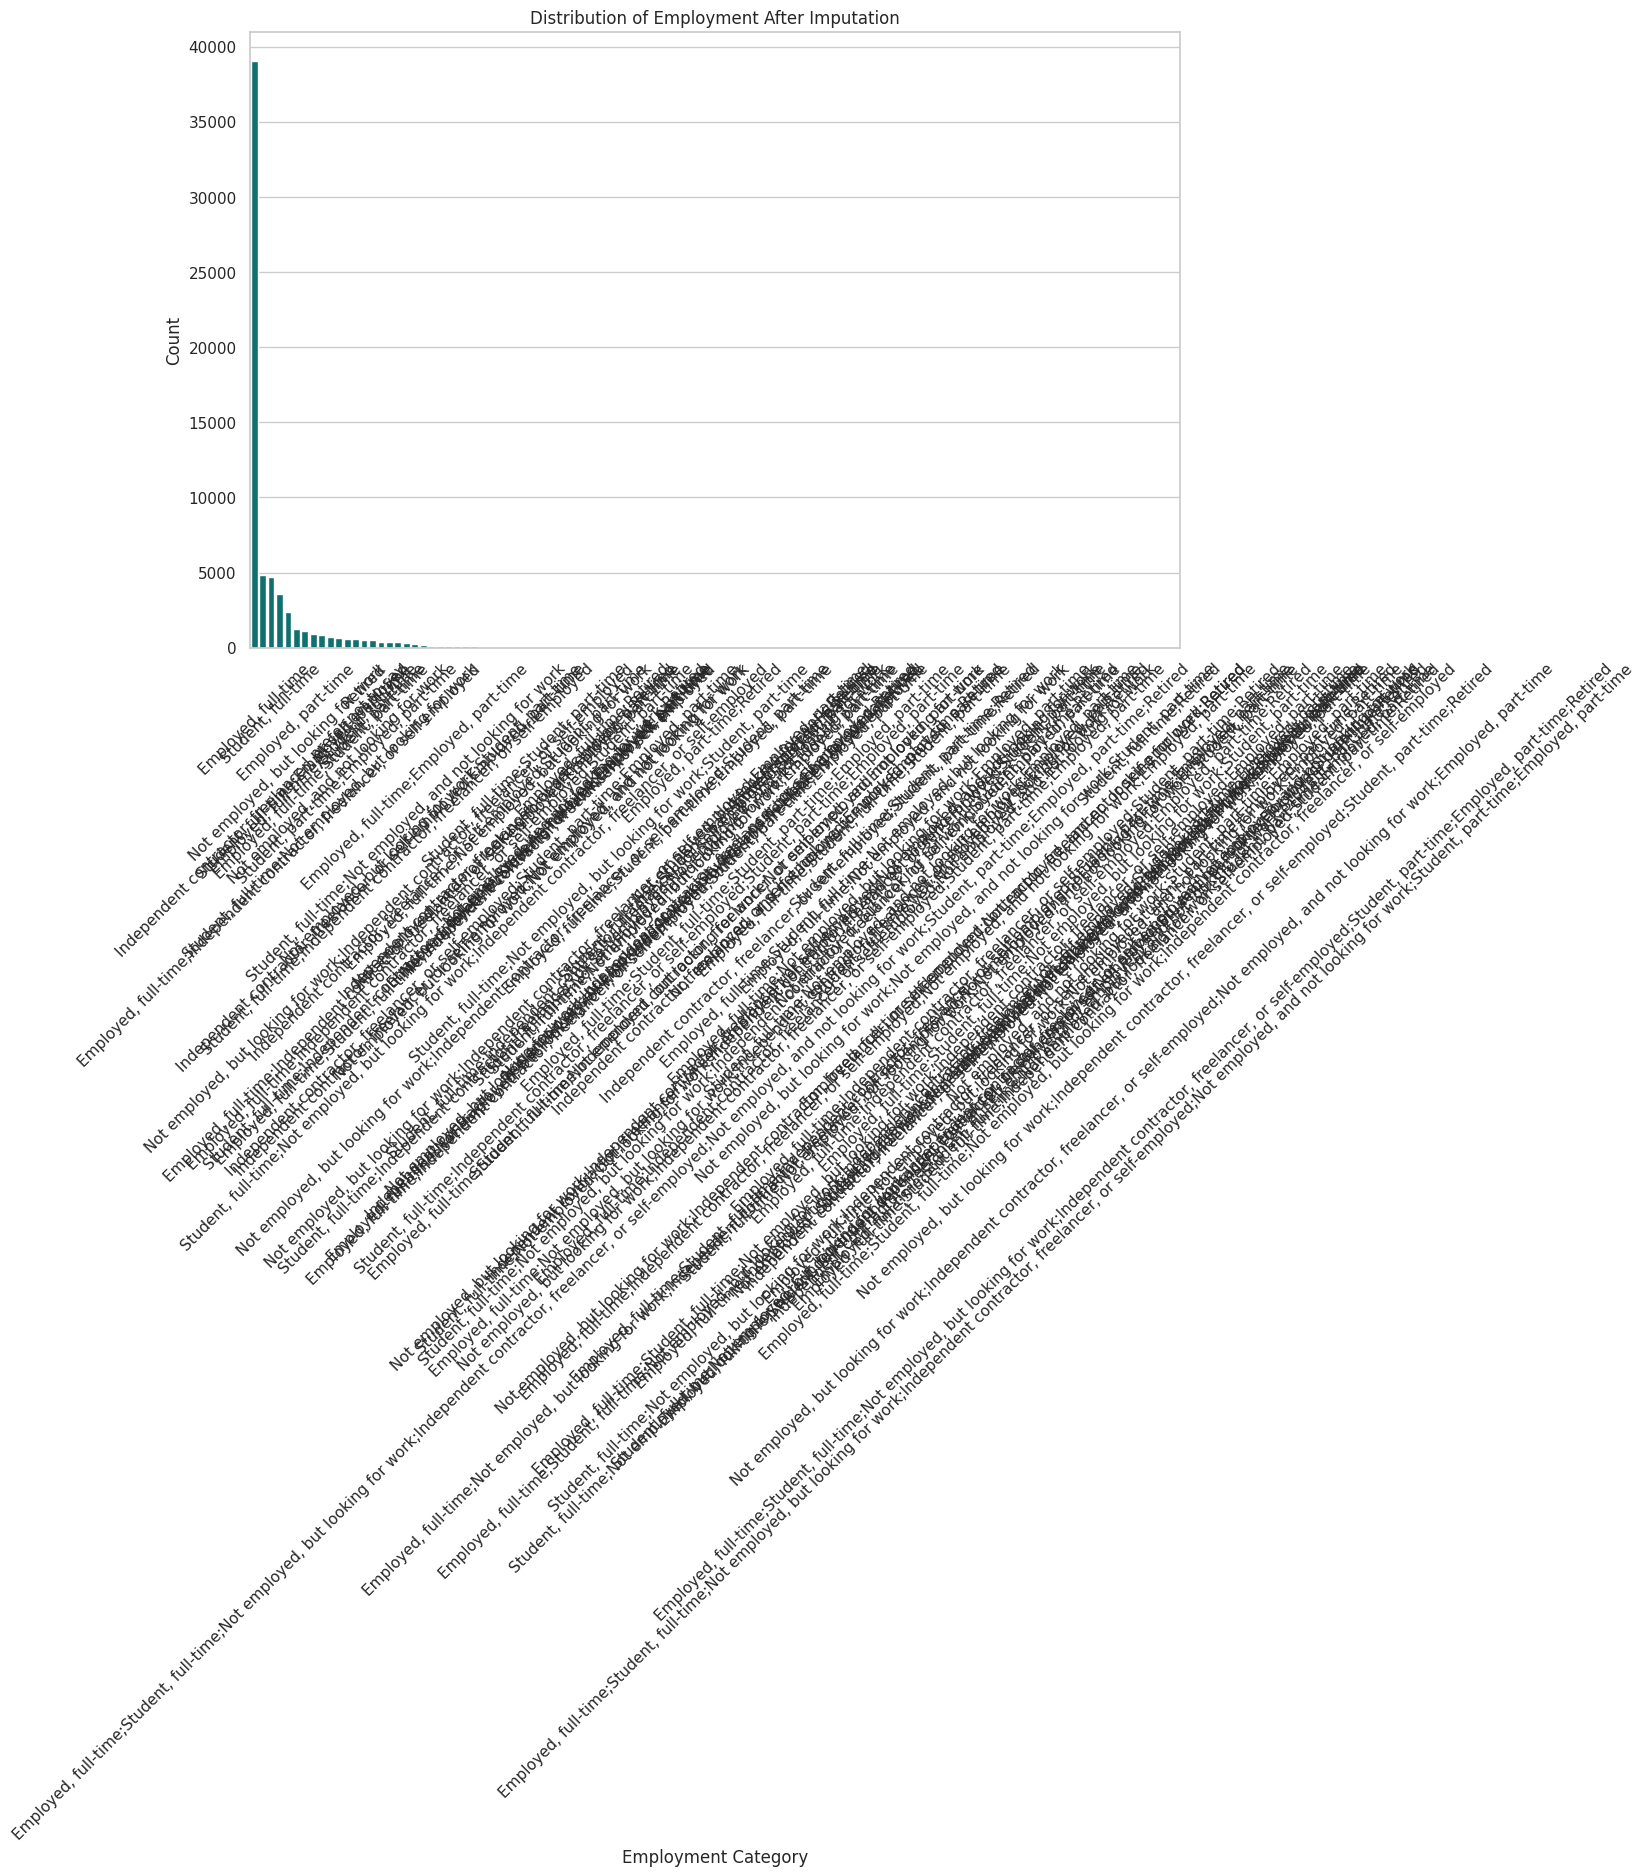

In [38]:
## Write your code here
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Employment', order=df['Employment'].value_counts().index, color='teal')
plt.title("Distribution of Employment After Imputation")
plt.xlabel("Employment Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


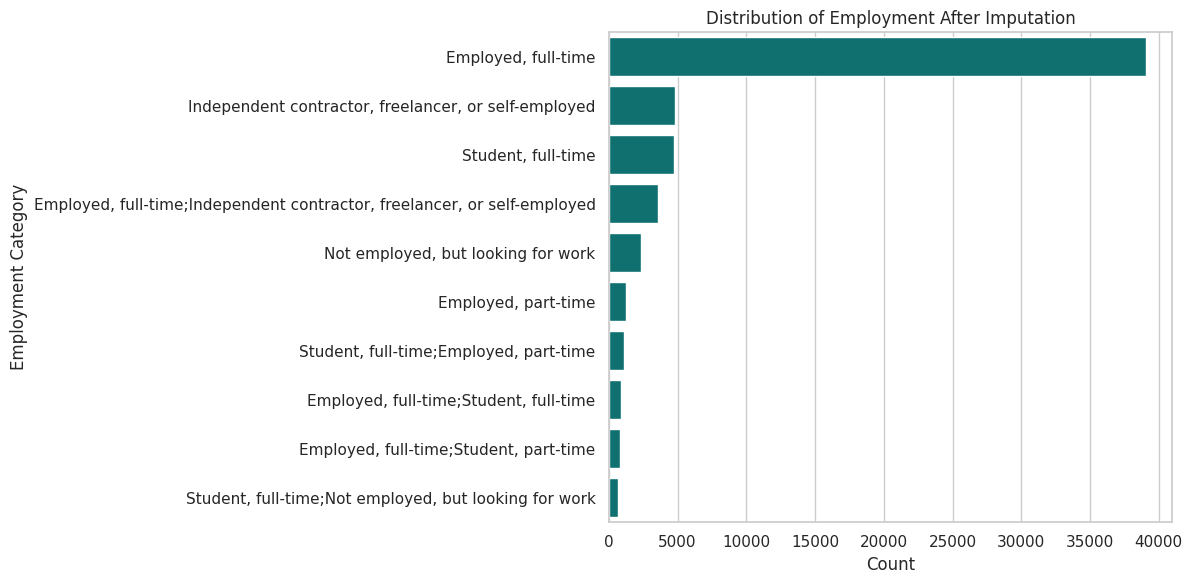

In [37]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df,
    y='Employment',
    order=df['Employment'].value_counts().head(10).index,
    color='teal'
)
plt.title("Distribution of Employment After Imputation")
plt.xlabel("Count")
plt.ylabel("Employment Category")
plt.tight_layout()
plt.show()


/tmp/ipykernel_300/630021901.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Employment', order=df['Employment'].value_counts().index, palette='magma')
/tmp/ipykernel_300/630021901.py:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


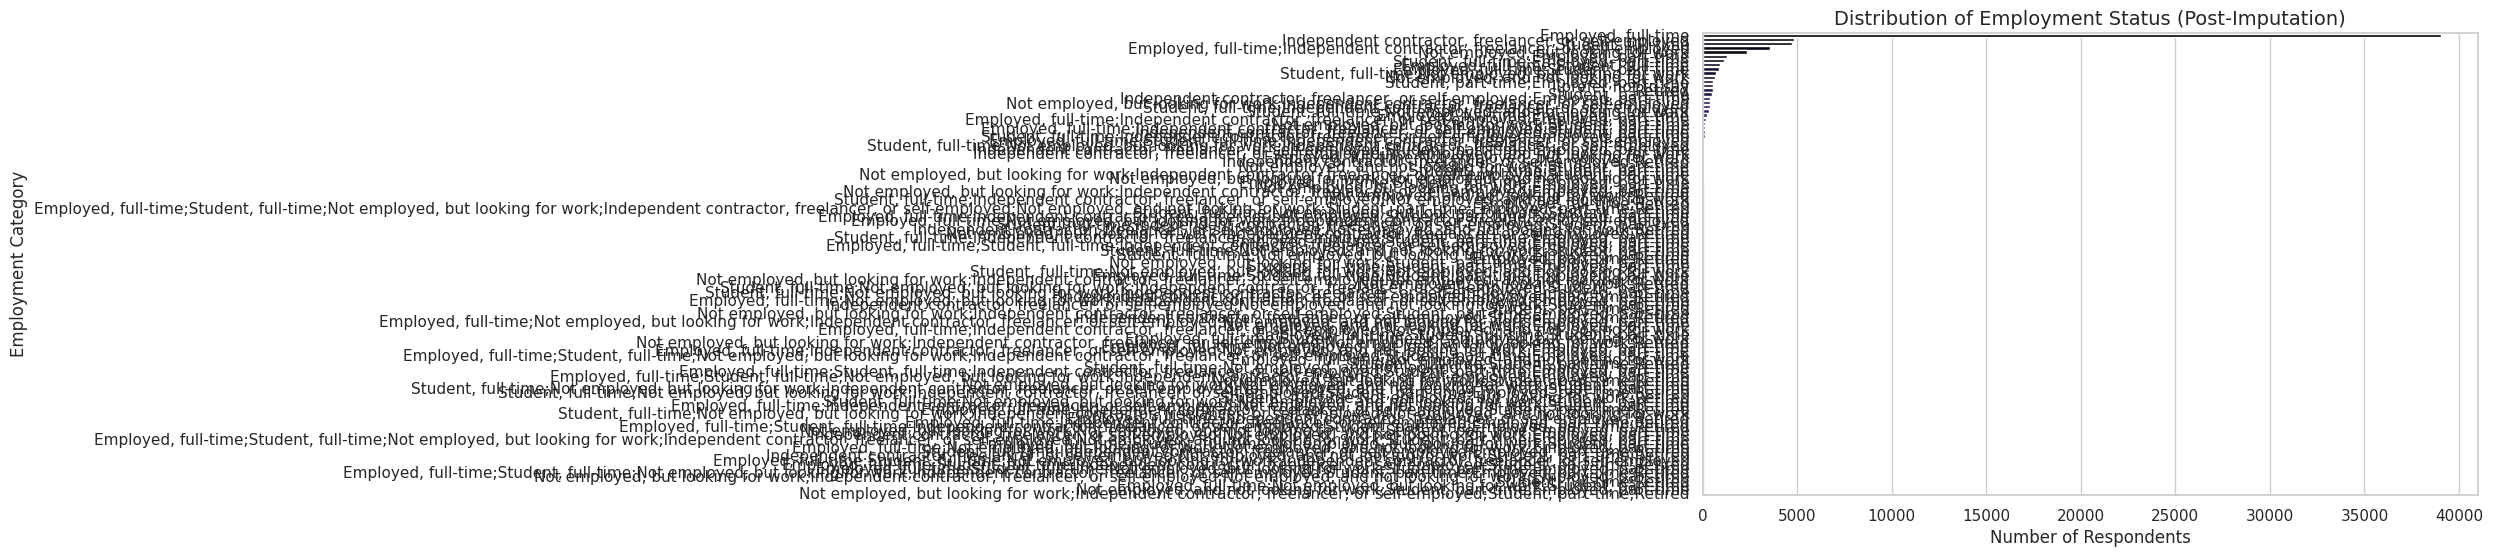

In [26]:
# Set the visual style
sns.set_theme(style="whitegrid")

# Create the figure
plt.figure(figsize=(10, 6))

# Use seaborn's countplot to show the frequency of each employment status
# We use value_counts().index to ensure the bars are ordered by frequency
sns.countplot(data=df, y='Employment', order=df['Employment'].value_counts().index, palette='magma')

# Adding titles and labels
plt.title('Distribution of Employment Status (Post-Imputation)', fontsize=14)
plt.xlabel('Number of Respondents', fontsize=12)
plt.ylabel('Employment Category', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_300/1123244440.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


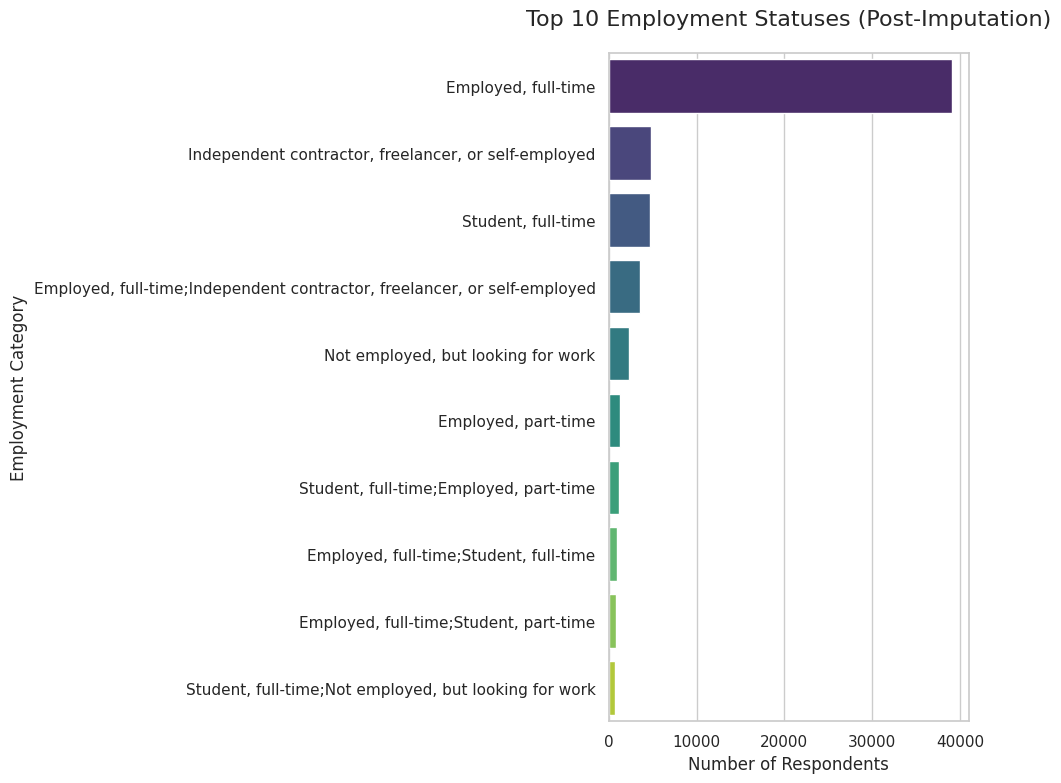

In [27]:
# 1. Increase figure height to prevent label overlap
plt.figure(figsize=(10, 8))

# 2. Use a horizontal countplot to make long category names readable
# We limit it to the top 10 to reduce congestion
top_employment = df['Employment'].value_counts().head(10)

sns.barplot(
    x=top_employment.values, 
    y=top_employment.index, 
    palette='viridis'
)

# 3. Clean up the aesthetics
plt.title('Top 10 Employment Statuses (Post-Imputation)', fontsize=16, pad=20)
plt.xlabel('Number of Respondents', fontsize=12)
plt.ylabel('Employment Category', fontsize=12)

# Adjust layout to ensure labels aren't cut off
plt.tight_layout()
plt.show()

### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
